<a href="https://colab.research.google.com/github/vbanai/ML-Technics-in-Sales-and-Marketing/blob/main/A_B_Tests_(fast_food_marketing_campaign%2C_webdesign).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.) A/B TEST FOR DATASET WITH CONTINUOUS VALUE</br>
    Fast Food Marketing Campaign

Dataset is downloaded from Kaggle. The scenario is that a fast food chain plans to add a new item to its menu. One of the common questions being what promotion has the greatest effect on sales. In order to determine this, the new item is introduced at locations in several randomly selected markets using three different marketing campaigns. I would like to carry out A/B testing among the promotion campaigns to see which is the best option.

In [ ]:
import os


os.environ['KAGGLE_USERNAME'] = "viktorbanai" # username from the json file
os.environ['KAGGLE_KEY'] = "9431db56af1a1a63cab88b4e516a2248" # key from the json file
!kaggle datasets download -d duonghoanvu1/marketing-campaign-fast-food # api copied from kaggle

!mkdir file_file_destination_a_b_testing
!unzip -u "/content/marketing-campaign-fast-food.zip" -d "/content/file_destination_a_b_testing"



  0% 0.00/3.36k [00:00<?, ?B/s]
100% 3.36k/3.36k [00:00<00:00, 2.83MB/s]
Archive:  /content/marketing-campaign-fast-food.zip
  inflating: /content/file_destination_a_b_testing/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv  


In [ ]:
import pandas as pd
df_initial = pd.read_csv("/content/file_destination_a_b_testing/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv")
df_initial.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [ ]:
print("Rows: ", df_initial.shape[0])
print("Columns: ", df_initial.shape[1])
print("\nFeatures: \n ", df_initial.columns.tolist())
print("\nMissing values:  ", df_initial.isnull().sum().values.sum())
print('\nUnique values:  \n', df_initial.nunique())

Rows:  548
Columns:  7

Features: 
  ['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion', 'week', 'SalesInThousands']

Missing values:   0

Unique values:  
 MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64


In [ ]:
SalesInThousands=pd.DataFrame(df_initial.groupby('Promotion').sum()['SalesInThousands'])
SalesInThousands

,SalesInThousands
Promotion,
1,9993.03
2,8897.93
3,10408.52


In [ ]:
SalesInThousands.rename(index={1: 'Promotion 1', 2: 'Promotion 2', 3: 'Promotion 3'}, inplace =True)

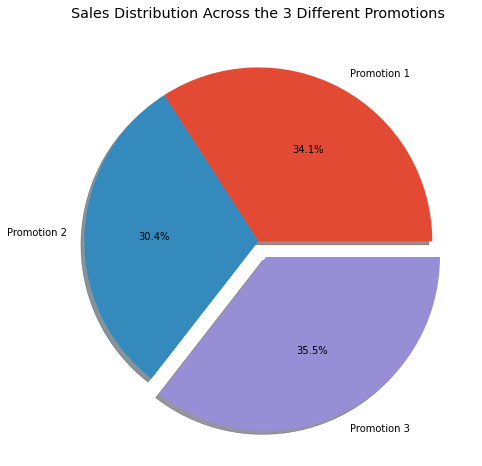

In [ ]:
plt.style.use("ggplot")
SalesInThousands.plot.pie(figsize=(8,8),\
                  title="Sales Distribution Across the 3 Different Promotions", legend=False,\
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, y='SalesInThousands',ylabel='',startangle=0)


In [ ]:
age=pd.DataFrame(df_initial['AgeOfStore'].value_counts())
age.sort_index(ascending=True, inplace=True)
age

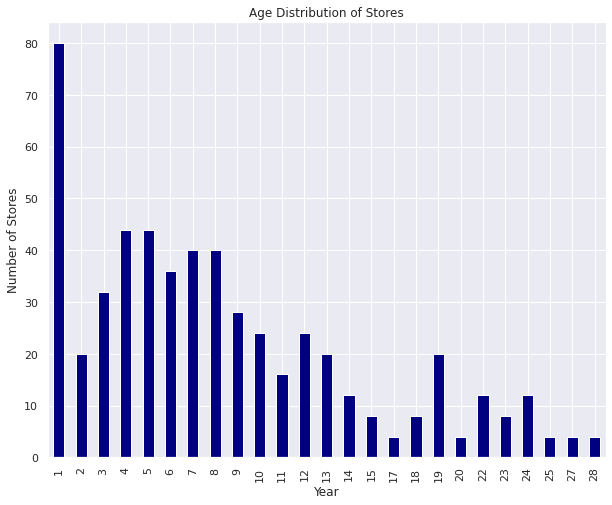

In [ ]:
age.plot(kind="bar", figsize=(10,8), legend=False, title="Age Distribution of Stores", xlabel="Year", ylabel='Number of Stores')

Check the 3 campaigns if the data is roughly similar with respect to age and market size

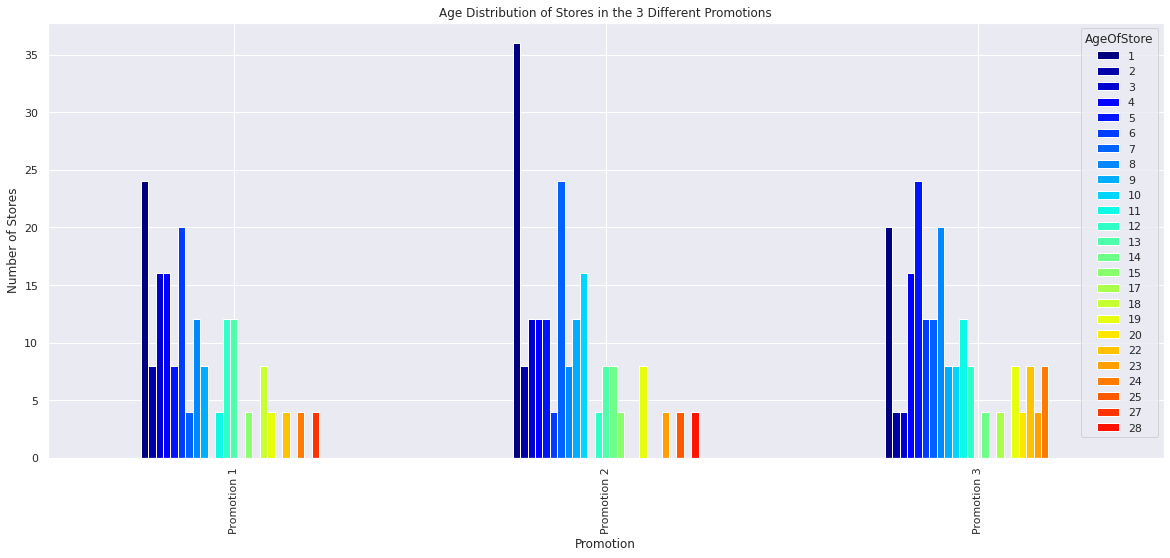

In [ ]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np

N = 28 # number of colors
plt.rcParams["axes.prop_cycle"] = cycler('color', plt.cm.jet(np.linspace(0,1,N)) )

sns.color_palette("rocket", as_cmap=True)
AgeOfStore=pd.DataFrame(df_initial.groupby(['Promotion', 'AgeOfStore']).count()['MarketID'].unstack('AgeOfStore'))
AgeOfStore.rename(index={1: 'Promotion 1', 2: 'Promotion 2', 3: 'Promotion 3'}, inplace=True)
AgeOfStore.plot(kind="bar", figsize=(20,8),\
                title="Age Distribution of Stores in the 3 Different Promotions", ylabel='Number of Stores')

Text(0.5, 1.0, 'overall distributions on the age of stores')

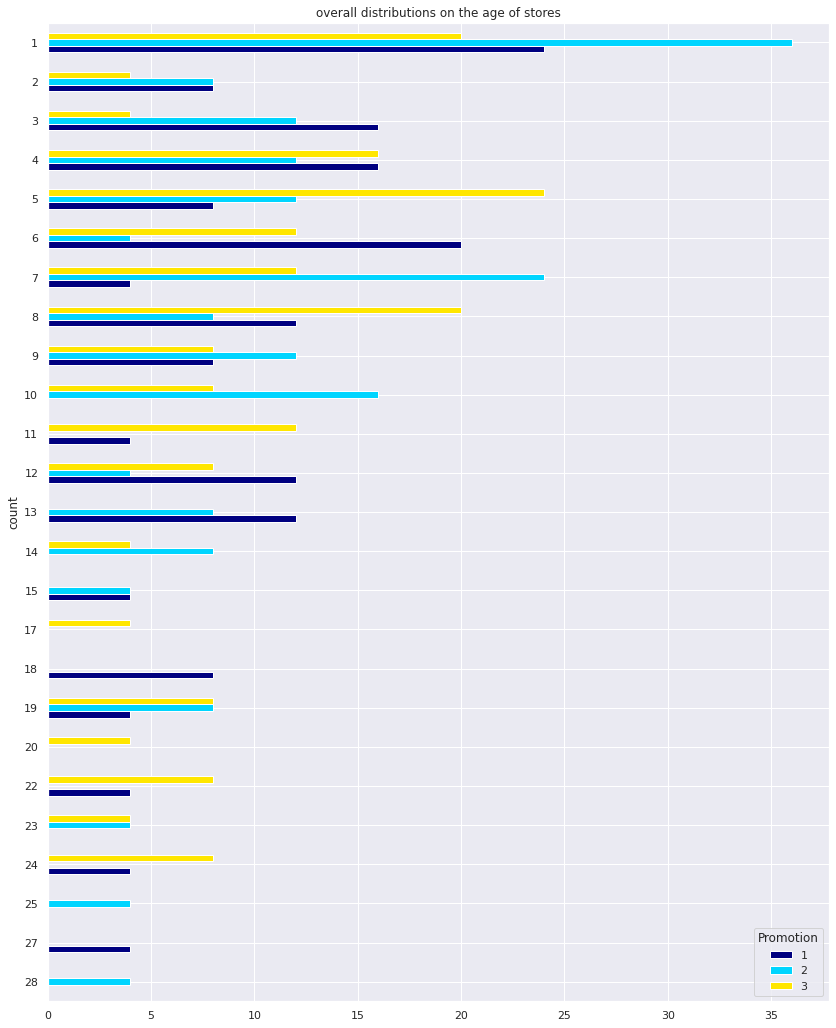

In [ ]:

N = 4 # number of colors
plt.rcParams["axes.prop_cycle"] = cycler('color', plt.cm.jet(np.linspace(0,1,N)) )
ax=df_initial.groupby(['AgeOfStore', 'Promotion']).count()['MarketID'].unstack('Promotion').iloc[::-1].plot(kind='barh',\
figsize=(14,18), grid=True)
ax.set_ylabel('age')
ax.set_ylabel('count')
ax.set_title('overall distributions on the age of stores')

In [ ]:
AgeOfStore=pd.DataFrame(df_initial.groupby(['Promotion', 'MarketSize']).sum()['AgeOfStore']/df_initial.groupby(['Promotion', 'MarketSize']).count()['AgeOfStore'])
#simpler: AgeOfStore=pd.DataFrame(df_initial.groupby(['Promotion', 'MarketSize']).mean()['AgeOfStore'])
AgeOfStore=AgeOfStore.rename(columns={'AgeOfStore': 'Average Age of Shops per Markets'})
AgeOfStore

Average Age of Shops per Markets
Promotion MarketSize                                  
1         Large                               5.857143
          Medium                              9.125000
          Small                              11.000000
2         Large                               8.437500
          Medium                              7.481481
          Small                               9.500000
3         Large                               6.916667
          Medium                              9.724138
          Small                              11.500000

In [ ]:

AgeOfStore

AgeOfStore
Promotion MarketSize            
1         Large         5.857143
          Medium        9.125000
          Small        11.000000
2         Large         8.437500
          Medium        7.481481
          Small         9.500000
3         Large         6.916667
          Medium        9.724138
          Small        11.500000

In [ ]:
df_initial.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


In [ ]:
MarketSize=pd.DataFrame(df_initial.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize'))
MarketSize.rename(index={1: 'Promotion 1', 2: 'Promotion 2', 3: 'Promotion 3'}, inplace=True)

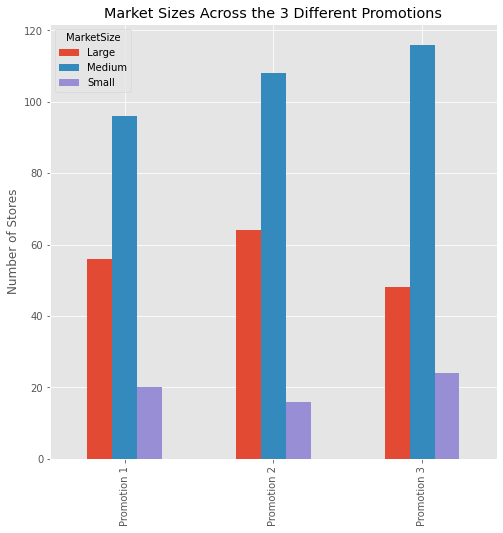

In [ ]:
MarketSize.plot(kind="bar", figsize=(8,8),\
                title="Market Sizes Across the 3 Different Promotions", xlabel='', ylabel='Number of Stores')

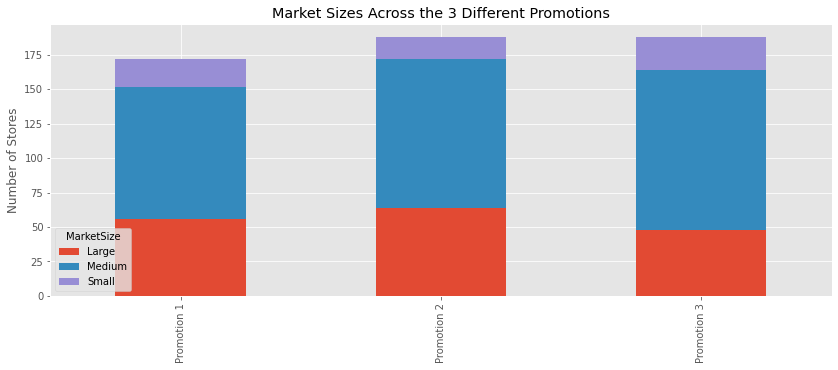

In [ ]:
MarketSize.plot(kind="bar", figsize=(14,5),\
                title="Market Sizes Across the 3 Different Promotions", xlabel='', stacked=True, ylabel='Number of Stores')

A/B TESTING

Check the distribution of the Sales in Thousands values and the sample size by promotion to check if we can perform independent t-test. T-test can be done if the distribution is normal, or if it is not normal, we should have sample size more then 30. If n<30 and we don't have normal distribution, I will consider using Mann-Whitney U test.

Promotion1: n= 172
Promotion2: n= 188
Promotion3: n= 188


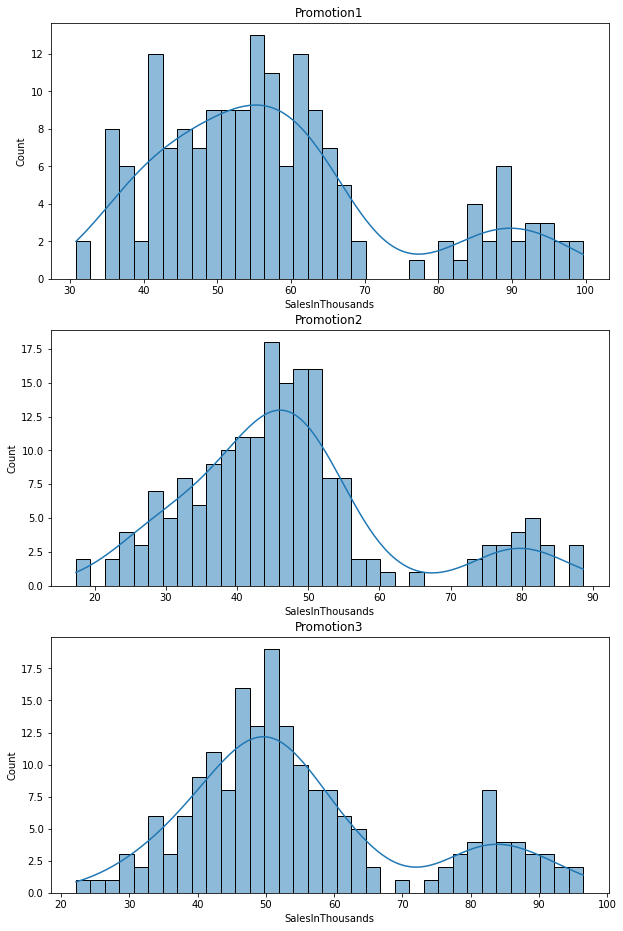

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,16))
for i in range(3):
  plt.subplot(3, 1, i+1)
  sns.histplot(df_initial.loc[df_initial['Promotion']==i+1]['SalesInThousands'], bins=35, kde=True)
  plt.title("Promotion"+str(i+1))
  print("Promotion"+str(i+1)+":", "n=", len(df_initial.loc[df_initial['Promotion']==i+1]))

INDEPENDENT T-TEST

We don't have normal distribution, but the sample size is more than 30, so I will use independent t test.

Check the Sales in Thousands values and calculate "p" and "t" values to see if there is difference between sales promotions with respect performance

Promotion 1 vs Promotion 2

In [ ]:

means=df_initial.groupby('Promotion').mean()['SalesInThousands']
stds=df_initial.groupby('Promotion').std()['SalesInThousands']
ns=df_initial.groupby('Promotion').count()['SalesInThousands']

from scipy import stats

t, p=stats.ttest_ind(df_initial.loc[df_initial['Promotion']==1, 'SalesInThousands'].values,
                     df_initial.loc[df_initial['Promotion']==2, 'SalesInThousands'].values,
                     equal_var=False)

print(means)
print('t-value=' +str(t))
print('p-value=' +str(p))

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64
t-value=6.42752867090748
p-value=4.2903687179871785e-10


Analysis of P and T-values<br>
<br>
Our P-value is close to 0 which suggest that there is a good evience to reject the 
null hypthesis. The alternativ hypothesis is there is a statistical difference between
the two groups. Our threshold rejecting the null is 0.05. So p value show if the difference is reliable, t value show how big the difference is.<br>
<br>
Our t-test shows that the marketing performances for these two groups are significantly different
and that the promotion group 1 outperforms promotion group 2.(Mean of promotion 1 larger than mean of promotion 2). Large t-values indicate high degree of differences between the two groups. Telling the truth 6 is not so high.

Promotion 1 vs Promotion 3

In [ ]:
means=df_initial.groupby('Promotion').mean()['SalesInThousands']
stds=df_initial.groupby('Promotion').std()['SalesInThousands']
ns=df_initial.groupby('Promotion').count()['SalesInThousands']

from scipy import stats

t, p=stats.ttest_ind(df_initial.loc[df_initial['Promotion']==1, 'SalesInThousands'].values,
                     df_initial.loc[df_initial['Promotion']==3, 'SalesInThousands'].values,
                     equal_var=False)

print(means)
print('t-value=' +str(t))
print('p-value=' +str(p))

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64
t-value=1.5560224307758634
p-value=0.12059147742229478


According to the p and t value we can state that null hyptotesis can't be rejected and there is no evidence that any of these two groups outperform the other, in spite of the fact that the mean of group 1 is slightly larger compared to the mean of group 3, this diference can be considered that it is due to  random chance. 

2.) A/B TEST FOR DATASET WITH DESCRETE VALUE</br>
Webdesign test

I perform an A/B test for check two different WEBDESIGN, where I test a banner with green button or red button. The metric will be the click -through rate, showing how many people clicked on the banner with red button and how many people clicked on the banner with green button. Both banners take to the same webpage.  By means of the A/B test we can decide which button is more effective and produce more click through rate in the real life.

In [ ]:
#Calculate the sample size
from scipy.stats import norm, zscore

def sample_power_probtest(p1, p2, power=0.8, sig=0.05):
    z = norm.isf([sig/2]) #two-sided t test
    zp = -1 * norm.isf([power]) 
    d = (p1-p2)
    s =2*((p1+p2) /2)*(1-((p1+p2) /2))
    n = s * ((zp + z)**2) / (d**2)
    return print("Suggested sample size: ", int(round(n[0])))

sample_power_probtest(p1=0.5, p2=0.75, power=0.8, sig=0.05)

#p1 I suppose 50% people will click on the button on the banner
#p2 = p1 +effect size, strength of difference, for example R, coeficient in regression, larger the effect, larger the power (how much effect we want to achive with testing (how much % of the population it effect)
#power=statistical power  prob that we correctly reject the 0 hypotesis, function of effect size, alpha, sample size etc. (power is larger if we increase the sampel size, if we relax alpha value, even 0.1 or 0.15(bigger the prob to find sg), 80% is acceptable)
#sig=significance level (alpha, highest level of p we tolerate)

Suggested sample size:  59


I choose 60 people for N_control(showing red button) and also 60 for N_experiment (showing this group the green button)</br>
Let's see the result after the experiment, how many people clicked on the banner from the groups:</br>
</br>
X_control(red button on the banner)=33</br>
X_experiment(green button on the banner)=44</br>

In [ ]:
p_control=33/60
p_experiment=44/60

In [ ]:
#standard error (population proportion)  for control
import numpy as np
se_control = np.sqrt(p_control * (1 - p_control) / 60)

#standard error for experiment
se_experiment = np.sqrt(p_experiment * (1 - p_experiment) / 60)

#calculate confidence interval for control group
z_score = 1.96  #for 95% confidence interval
lower_limit = p_control - z_score* se_control #lower limit of the CI
upper_limit = p_control + z_score* se_control #upper limit of the CI




In [ ]:
#Calculation the confidence interval of the difference in the population proportion of control and experiment group clicking on the banner

# calculate the difference in the standard error of control and experiment group clicking on the banner.
se_diff = np.sqrt(se_control**2 + se_experiment **2)

#Construct the confidence interval for the difference
#if the range imply 0 we can say the control and experiment group clicking on the banner is the same.

d=p_experiment - p_control

lci = d - 1.96 * se_diff  #lower limit of the CI
uci = d + 1.96 * se_diff  #upper limit of the CI

In [ ]:
lci

0.014907176307857012

In [ ]:
uci

0.3517594903588095

The Confidence interval is 0.01 and 0.35 This range does not have 0 in it. Both the numbers are above zero. So, we cannot make any conclusion that the control population clicking on the banner is the same as the experiment population clicking on the banner. More people clicked on the banner with green button, so we can say, that the green button is expected to produce higher click -through rate. 